# Convert South Africa fuel data to raster
The column of interest is a string column named "FireR". 

In [6]:
from geocube.api.core import make_geocube
import geopandas as gpd
import numpy as np


inFileName = "/Users/stadmin/Documents/layers/southAfrica/333 sampledata/MTOc333Comptlist_Fuel_Weedsv2GEOv2.shp"

polys = gpd.read_file(inFileName)

       FireR               landuse  FireRisk
0     Yellow                   NaN         9
1     Orange         Riparian zone         3
2        NaN      ESKOM power line         0
3     Orange  Bog/Vlei/Marsh/Swamp         3
4     Orange         Riparian zone         3
...      ...                   ...       ...
4182  Orange                   NaN         3
4183  Orange                   NaN         3
4184     NaN    Riparianbuffer FIM         0
4185     NaN    Riparianbuffer FIM         0
4186     NaN                 Roads        91

[4187 rows x 3 columns]


<Axes: >

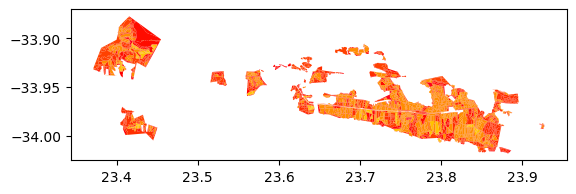

In [7]:
fR = polys['FireR']
# 93 == agriculture
# 1 == short grass
# 3 == tall grass
# 4== Chapparral
# 9 == hardwood litter
# 91 == urban
# 0 == undefined
# 12 == heavy slash

frQuantized = 93*(fR == 'Blue') \
+ 1*(fR == 'Green')  \
+ 3*(fR == 'Orange') \
+ 4*(fR == 'Red')  \
+ 9*(fR == 'Yellow')   \
+ 91 * (polys['Landuse'] == 'Roads')  \
+ 12 * (np.logical_and(fR.isnull(),polys['Landuse'].isnull())) 
print(gpd.GeoDataFrame({'FireR': fR, 'landuse':polys['Landuse'] , 'FireRisk': frQuantized}))
newGeo = gpd.GeoDataFrame({'geometry': polys['geometry'], 'FireRisk': frQuantized})
newGeo.plot(column='FireRisk', legend=False , cmap='hsv')

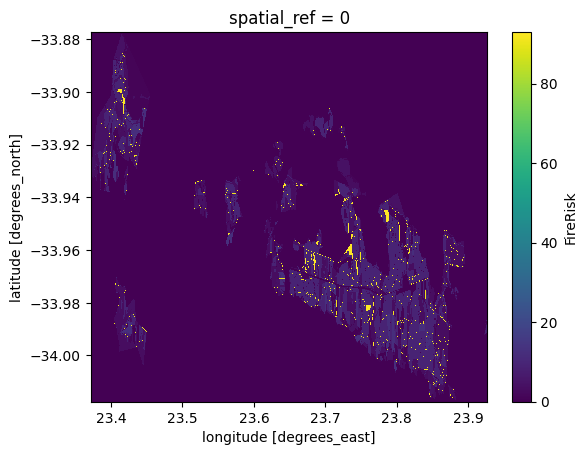

In [8]:
rasterized = make_geocube(vector_data=newGeo, measurements=['FireRisk'], resolution=(-0.0001, 0.0001), fill=0)
rasterized.FireRisk.plot()
rasterized.FireRisk.rio.to_raster("/Users/stadmin/Documents/layers/southAfrica/333 sampledata/MTOc333Comptlist_Fuel_Weedsv2GEOv2.tif")

In [12]:
import rasterio

fuels = rasterio.open("/Users/stadmin/Documents/layers/southAfrica/333 sampledata/MTOc333Comptlist_Fuel_Weedsv2GEOv2.tif")
# get histogram of values
hist = fuels.read(1).flatten()
# hist = hist[hist != 0]
print(np.unique(hist, return_counts=True))

(array([ 0.,  1.,  3.,  4.,  9., 12., 91., 93.]), array([6442623,  140973,  322982,  182306,  582596,   62202,   34655,
         18371]))
